In [4]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
import numpy as np
import sklearn as sk
import os
import glob

#robust scaling for imaging
os.chdir('~/Desktop/hyperion_normalization/input_files_2')
filenames = sorted(glob.glob('*.txt'))
filenames = filenames[0:94]
#df = pd.read_csv(filenames[0],sep='\t')

for filename in filenames:
    print(filename)
    df = pd.read_csv(filename,sep='\t')
    #df.append(df_temp)
    #print(filenames) 
        
#data to be normalized excluding the columns listed 
    df1=df[df.columns[~df.columns.isin(['ImageId','CellId','MinorAxisLength','Orientation','X_position','Y_position','Percent_Touching','Area','Eccentricity','Solidity','Extent','EulerNumber','Perimeter','MajorAxisLength','134Xe_Xe134','80ArAr_ArAr80','FOXP3_Gd155','Ir193_Ir193','LAG3_Eu153','OX40_Eu151','PD1_Ho165','TIGIT_Dy160','_Ba138','_Ce140','_Gd157','_La139','_Lu176','_Nd144','_Sm147','_Yb172'])]]
    df1    
    #separate dataframe of columns excluded from normalization
    df2=df[df.columns[df.columns.isin(['MinorAxisLength','Orientation','X_position','Y_position','Percent_Touching','Area','Eccentricity','Solidity','Extent','EulerNumber','Perimeter','MajorAxisLength','134Xe_Xe134','80ArAr_ArAr80','FOXP3_Gd155','Ir193_Ir193','LAG3_Eu153','OX40_Eu151','PD1_Ho165','TIGIT_Dy160','_Ba138','_Ce140','_Gd157','_La139','_Lu176','_Nd144','_Sm147','_Yb172'])]]
    df2
    df3=df[df.columns[df.columns.isin(['ImageId','CellId'])]]
    
    
    def robust_scaling(df):
        # copy the dataframe
        df_robust = df.copy()
        # apply robust scaling
        for column in df_robust.columns:
            df_robust[column] = (df_robust[column] - df_robust[column].median())  / (df_robust[column].quantile(0.99) - df_robust[column].quantile(0.1))
        return df_robust
    
        #call the robust_scaling function
    df_RScaled = robust_scaling(df1)
    df_scaled = pd.DataFrame(df_RScaled,columns=df1.columns, index=df.index)
    #print(df_scaled)
    df_scaled2 = df_scaled.add_suffix('_Norm_robust')
    df_scaled_concat=pd.concat([df3,df_scaled2,df1,df2],axis=1)
    #df_scaled_concat
    #writing data
    
    df_scaled_concat.to_csv('Norm_Robust_0.99_'+ filename + '.csv',index=False)

FL_controll_s0_p3_r1_a1_ac.txt
TA39_IV_s0_p4_r6_a6_ac.txt
TA51_s0_p3_r17_a17_ac.txt


Text(0.5, 1.0, 'The robust Scaling and minmax')

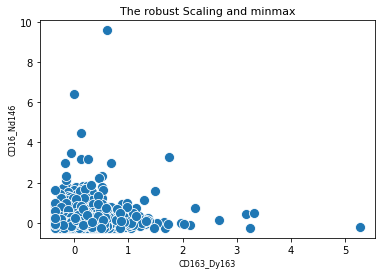

In [5]:
 # scatter plot of the data after applying min-max scaling
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
sns.color_palette("rocket", as_cmap=True)
#minmax

sns.scatterplot(x='CD163_Dy163', y='CD16_Nd146', data=df_RScaled, s=100)

# xticks and yticks
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)

# labels and title
plt.xlabel('CD163_Dy163', fontsize=8)
plt.ylabel('CD16_Nd146', fontsize=8)
plt.title('The robust Scaling', fontsize=11)